# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Ingest Data  

In [63]:
df = pd.read_excel("World military power.xlsx")
df

<IPython.core.display.Javascript object>

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,A

# EDA

In [64]:
df.columns = df.iloc[0,:]
df.head(90)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albani

In [4]:
df.shape

(139, 60)

In [65]:
df = df.iloc[1:, ::]

In [66]:
df.head(70)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
5,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49,Argentina,0,Argentina,2,Argentina,4,Argentina,0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968
6,Armenia,2.1251,Armenia,64,Armenia,0,Armenia,9,Armenia,3,Armenia,13,Armenia,37,Armenia,20,Armenia,110,Armenia,748,Armenia,38,Armenia,150,Armenia,68,Armenia,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Armenia,"1,38,50,00,000

In [67]:
df.shape

(138, 60)

In [68]:
df["Military Strength"].isnull().sum()

0

In [69]:
df.drop(df.iloc[::, 2:59:2], axis=1, inplace = True)

In [70]:
df.head(10)

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968
6,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570
7,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,"26,30,00,00,000","17,14,00,00,00,000",480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000,NaN
8,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524
9,Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31,0,4,0,1,"2,80,50,00,000","17,41,00,00,000",37,"7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600,713,0,2468
10,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39,0,0,0,1,"1,41,50,00,000","52,15,00,00,000",4,45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0,NaN


In [71]:
df.shape

(138, 31)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

In [73]:
df.isnull().sum()

0
Military Strength                           0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value            

In [74]:
df["Navy Fleet Strengths value"]

1        0
2       38
3      201
4       57
5       49
6        0
7       48
8        0
9       31
10      39
11     112
12       0
13      17
14       0
15     173
16       0
17     NaN
18     112
19      29
20     NaN
21      27
22      64
23      64
24     NaN
25     NaN
26      69
27     777
28     453
29      28
30      12
31     NaN
32      20
33      74
34      33
35      19
36     316
37       4
38       6
39     NaN
40     246
41     180
42      10
43       9
44      80
45      20
46     116
47      26
48      59
49     NaN
50     285
51     282
52     398
53      60
54       8
55      65
56     249
57      10
58     155
59      37
60      15
61      19
62      38
63     NaN
64      36
65      18
66      57
67       0
68       5
69      12
70       8
71      61
72     NaN
73       5
74     189
75     NaN
76     NaN
77      18
78     121
79       8
80     187
81       8
82     NaN
83      63
84      11
85      30
86     NaN
87      75
88     984
89     NaN
90      62
91      16

In [75]:
df[df["Navy Fleet Strengths value"].isnull()].index

Int64Index([17, 20, 24, 25, 31, 39, 49, 63, 72, 75, 76, 82, 86, 89], dtype='int64')

In [76]:
df.iloc[[16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88], 0]

17                    Botswana
20                Burkina Faso
24    Central African Republic
25                        Chad
31                     Czechia
39                    Ethiopia
49                     Hungary
63                  Kyrgyzstan
72                        Mali
75                     Moldova
76                    Mongolia
82                       Nepal
86                       Niger
89             North Macedonia
Name: Military Strength, dtype: object

In [77]:
df.iloc[[16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88], 14]

17    NaN
20    NaN
24    NaN
25    NaN
31    NaN
39    NaN
49    NaN
63    NaN
72    NaN
75    NaN
76    NaN
82    NaN
86    NaN
89    NaN
Name: Navy Fleet Strengths value, dtype: object

In [78]:
df["Navy Fleet Strengths value"].fillna("0", inplace = True)

In [79]:
df.iloc[[16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88], 14]

17    0
20    0
24    0
25    0
31    0
39    0
49    0
63    0
72    0
75    0
76    0
82    0
86    0
89    0
Name: Navy Fleet Strengths value, dtype: object

In [80]:
df[df["Aircraft Carrier Fleet Strength value"].isnull()].index - 1

Int64Index([5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], dtype='int64')

In [81]:
df.iloc[[5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], 0]

6                       Armenia
8                       Austria
12                      Belarus
14                       Bhutan
17                     Botswana
20                 Burkina Faso
24     Central African Republic
25                         Chad
31                      Czechia
39                     Ethiopia
49                      Hungary
63                   Kyrgyzstan
72                         Mali
75                      Moldova
76                     Mongolia
82                        Nepal
86                        Niger
89              North Macedonia
107                    Slovakia
111                 South Korea
118                 Switzerland
121                  Tajikistan
133                  Uzbekistan
Name: Military Strength, dtype: object

In [82]:
df.iloc[[5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], 15]

6      NaN
8      NaN
12     NaN
14     NaN
17     NaN
20     NaN
24     NaN
25     NaN
31     NaN
39     NaN
49     NaN
63     NaN
72     NaN
75     NaN
76     NaN
82     NaN
86     NaN
89     NaN
107    NaN
111    NaN
118    NaN
121    NaN
133    NaN
Name: Aircraft Carrier Fleet Strength value, dtype: object

In [83]:
df.iloc[[110],[15]] = 1

In [84]:
df.iloc[[110],[15]]

,Aircraft Carrier Fleet Strength value
111,1


In [85]:
df.iloc[[5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], 15]

6      NaN
8      NaN
12     NaN
14     NaN
17     NaN
20     NaN
24     NaN
25     NaN
31     NaN
39     NaN
49     NaN
63     NaN
72     NaN
75     NaN
76     NaN
82     NaN
86     NaN
89     NaN
107    NaN
111      1
118    NaN
121    NaN
133    NaN
Name: Aircraft Carrier Fleet Strength value, dtype: object

In [86]:
df["Aircraft Carrier Fleet Strength value"].fillna("0", inplace = True)

In [87]:
df["Aircraft Carrier Fleet Strength value"].isnull().sum()

0

In [88]:
df[df["Submarine Fleet Strength value"].isnull()].index - 1

Int64Index([5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], dtype='int64')

In [89]:
df.iloc[[5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], 0]

6                       Armenia
8                       Austria
12                      Belarus
14                       Bhutan
17                     Botswana
20                 Burkina Faso
24     Central African Republic
25                         Chad
31                      Czechia
39                     Ethiopia
49                      Hungary
63                   Kyrgyzstan
72                         Mali
75                      Moldova
76                     Mongolia
82                        Nepal
86                        Niger
89              North Macedonia
107                    Slovakia
111                 South Korea
118                 Switzerland
121                  Tajikistan
133                  Uzbekistan
Name: Military Strength, dtype: object

In [90]:
df.iloc[[5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], 16]

6      NaN
8      NaN
12     NaN
14     NaN
17     NaN
20     NaN
24     NaN
25     NaN
31     NaN
39     NaN
49     NaN
63     NaN
72     NaN
75     NaN
76     NaN
82     NaN
86     NaN
89     NaN
107    NaN
111    NaN
118    NaN
121    NaN
133    NaN
Name: Submarine Fleet Strength value, dtype: object

In [91]:
df.iloc[[110],[16]] = 19

In [92]:
df.iloc[[110],[16]]

,Submarine Fleet Strength value
111,19


In [93]:
df["Submarine Fleet Strength value"].fillna("0", inplace = True)

In [94]:
df["Submarine Fleet Strength value"].isnull().sum()

0

In [95]:
df[df["Destroyer Fleet Strength value"].isnull()].index - 1

Int64Index([5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], dtype='int64')

In [96]:
df.iloc[[5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], 17]

6      NaN
8      NaN
12     NaN
14     NaN
17     NaN
20     NaN
24     NaN
25     NaN
31     NaN
39     NaN
49     NaN
63     NaN
72     NaN
75     NaN
76     NaN
82     NaN
86     NaN
89     NaN
107    NaN
111    NaN
118    NaN
121    NaN
133    NaN
Name: Destroyer Fleet Strength value, dtype: object

In [97]:
df.iloc[[110],[17]] = 12

In [98]:
df.iloc[[5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], 17]

6      NaN
8      NaN
12     NaN
14     NaN
17     NaN
20     NaN
24     NaN
25     NaN
31     NaN
39     NaN
49     NaN
63     NaN
72     NaN
75     NaN
76     NaN
82     NaN
86     NaN
89     NaN
107    NaN
111     12
118    NaN
121    NaN
133    NaN
Name: Destroyer Fleet Strength value, dtype: object

In [99]:
df["Destroyer Fleet Strength value"].fillna("0", inplace = True)

In [100]:
df["Destroyer Fleet Strength value"].isnull().sum()

0

In [101]:
df[df["Frigate Fleet Strength value"].isnull()].index - 1

Int64Index([5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], dtype='int64')

In [102]:
df.iloc[[5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], 18]

6      NaN
8      NaN
12     NaN
14     NaN
17     NaN
20     NaN
24     NaN
25     NaN
31     NaN
39     NaN
49     NaN
63     NaN
72     NaN
75     NaN
76     NaN
82     NaN
86     NaN
89     NaN
107    NaN
111    NaN
118    NaN
121    NaN
133    NaN
Name: Frigate Fleet Strength value, dtype: object

In [103]:
df.iloc[[110],[18]] = 14

In [104]:
df.iloc[[5, 7, 11, 13, 16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88, 106, 110, 117, 120, 132], 18]

6      NaN
8      NaN
12     NaN
14     NaN
17     NaN
20     NaN
24     NaN
25     NaN
31     NaN
39     NaN
49     NaN
63     NaN
72     NaN
75     NaN
76     NaN
82     NaN
86     NaN
89     NaN
107    NaN
111     14
118    NaN
121    NaN
133    NaN
Name: Frigate Fleet Strength value, dtype: object

In [105]:
df["Frigate Fleet Strength value"].fillna("0", inplace = True)

In [106]:
df["Frigate Fleet Strength value"].isnull().sum()

0

In [107]:
df[df["Total Coastline Coverage value"].isnull()].index - 1

Int64Index([5, 7, 11, 13, 14, 16, 19, 23, 24, 30, 38, 48, 62, 63, 71, 74, 75, 81, 85, 88, 93, 103, 106, 111, 117, 120, 126, 136, 137], dtype='int64')

In [108]:
df.iloc[[5, 7, 11, 13, 14, 16, 19, 23, 24, 30, 38, 48, 62, 63, 71, 74, 75, 81, 85, 88, 93, 103, 106, 111, 117, 120, 126, 136, 137], 0]

6                       Armenia
8                       Austria
12                      Belarus
14                       Bhutan
15                      Bolivia
17                     Botswana
20                 Burkina Faso
24     Central African Republic
25                         Chad
31                      Czechia
39                     Ethiopia
49                      Hungary
63                   Kyrgyzstan
64                         Laos
72                         Mali
75                      Moldova
76                     Mongolia
82                        Nepal
86                        Niger
89              North Macedonia
94                     Paraguay
104                      Serbia
107                    Slovakia
112                 South Sudan
118                 Switzerland
121                  Tajikistan
127                      Uganda
137                      Zambia
138                    Zimbabwe
Name: Military Strength, dtype: object

In [109]:
df.iloc[[5, 7, 11, 13, 14, 16, 19, 23, 24, 30, 38, 48, 62, 63, 71, 74, 75, 81, 85, 88, 93, 103, 106, 111, 117, 120, 126, 136, 137], 28]

6      NaN
8      NaN
12     NaN
14     NaN
15     NaN
17     NaN
20     NaN
24     NaN
25     NaN
31     NaN
39     NaN
49     NaN
63     NaN
64     NaN
72     NaN
75     NaN
76     NaN
82     NaN
86     NaN
89     NaN
94     NaN
104    NaN
107    NaN
112    NaN
118    NaN
121    NaN
127    NaN
137    NaN
138    NaN
Name: Total Coastline Coverage value, dtype: object

In [110]:
df["Total Coastline Coverage value"].fillna("0", inplace = True)

In [111]:
df["Total Coastline Coverage value"].isnull().sum()

0

In [112]:
df[df["Total Border Coverage value"].isnull()].index - 1

Int64Index([6, 9, 57, 69, 83, 95, 105, 113, 119], dtype='int64')

In [113]:
df.iloc[[6, 9, 57, 69, 83, 95, 105, 113, 119], 0]

7        Australia
10         Bahrain
58           Japan
70      Madagascar
84     New Zealand
96     Philippines
106      Singapore
114      Sri Lanka
120         Taiwan
Name: Military Strength, dtype: object

In [114]:
df.iloc[[6, 9, 57, 69, 83, 95, 105, 113, 119], 30]

7      NaN
10     NaN
58     NaN
70     NaN
84     NaN
96     NaN
106    NaN
114    NaN
120    NaN
Name: Total Border Coverage value, dtype: object

In [115]:
df["Total Border Coverage value"].fillna("0", inplace = True)

In [116]:
df["Total Border Coverage value"].isnull().sum()

0

## Check for missing values 

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

## Implement basic steps to see how is your data looks like

In [118]:
df.head(10)

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968
6,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0,0,0,0,0,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,0,0,1570
7,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,"26,30,00,00,000","17,14,00,00,00,000",480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000,0
8,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0,0,0,0,0,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,0,0,2524
9,Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31,0,4,0,1,"2,80,50,00,000","17,41,00,00,000",37,"7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600,713,0,2468
10,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39,0,0,0,1,"1,41,50,00,000","52,15,00,00,000",4,45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0,0


## Fix the dtypes

In [119]:
df.columns

Index(['Military Strength', 'Military Strength Power Index', 'Aircraft Strength value', 'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value', 'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength value', 'Tank Strength value', 'AFV/APC Strength value', 'Self-Propelled Artillery Strength value', 'Towed Artillery Strength value', 'Rocket Projector Strength value', 'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'defense spending budget value', 'External Debt value', 'Airport Totals value', 'Oil Production value', 'Oil Consumption value', 'Proven Oil Reserves value', 'Available Manpower value', 'Total Population value', 'Total Square Land Area value', 'Total Coastline Coverage value', 'Total Waterway Coverage value', 'Total Border Coverage value'], dtype='object

In [120]:
c = ['Military Strength Power Index', 'Aircraft Strength value', 'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value', 'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength value', 'Tank Strength value', 'AFV/APC Strength value', 'Self-Propelled Artillery Strength value', 'Towed Artillery Strength value', 'Rocket Projector Strength value', 'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'defense spending budget value', 'External Debt value', 'Airport Totals value', 'Oil Production value', 'Oil Consumption value', 'Proven Oil Reserves value', 'Available Manpower value', 'Total Population value', 'Total Square Land Area value', 'Total Coastline Coverage value', 'Total Waterway Coverage value', 'Total Border Coverage value']

In [122]:
for i in c:
    df[i] = df[i].map(lambda x : str(x).replace(",", ""))

In [123]:
for i in c:
    df[i] = df[i].astype('int64')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    int64 
 2   Aircraft Strength value                  138 non-null    int64 
 3   Fighter/Interceptor Strength value       138 non-null    int64 
 4   Attack Aircraft Strength value           138 non-null    int64 
 5   Transport Aircraft Fleet Strength value  138 non-null    int64 
 6   Trainer Aircraft Fleet value             138 non-null    int64 
 7   Helicopter Fleet Strength value          138 non-null    int64 
 8   Attack Helicopter Fleet Strength value   138 non-null    int64 
 9   Tank Strength value                      138 non-null    int64 
 10  AFV/APC Strength value                   138 non-null    int64

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [125]:
df2 = df.copy()

In [126]:
df.drop(df.columns[[27, 28, 29, 30]], axis = 1, inplace = True)

In [127]:
df3 = df.copy()

In [128]:
df.drop(columns = "Military Strength", axis = 1, inplace = True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Military Strength Power Index            138 non-null    int64
 1   Aircraft Strength value                  138 non-null    int64
 2   Fighter/Interceptor Strength value       138 non-null    int64
 3   Attack Aircraft Strength value           138 non-null    int64
 4   Transport Aircraft Fleet Strength value  138 non-null    int64
 5   Trainer Aircraft Fleet value             138 non-null    int64
 6   Helicopter Fleet Strength value          138 non-null    int64
 7   Attack Helicopter Fleet Strength value   138 non-null    int64
 8   Tank Strength value                      138 non-null    int64
 9   AFV/APC Strength value                   138 non-null    int64
 10  Self-Propelled Artillery Strength value  138 non-null    int64
 11  Towed 

## Visualy inspect the some features

In [131]:
plt.rcParams["figure.figsize"] = (10,10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

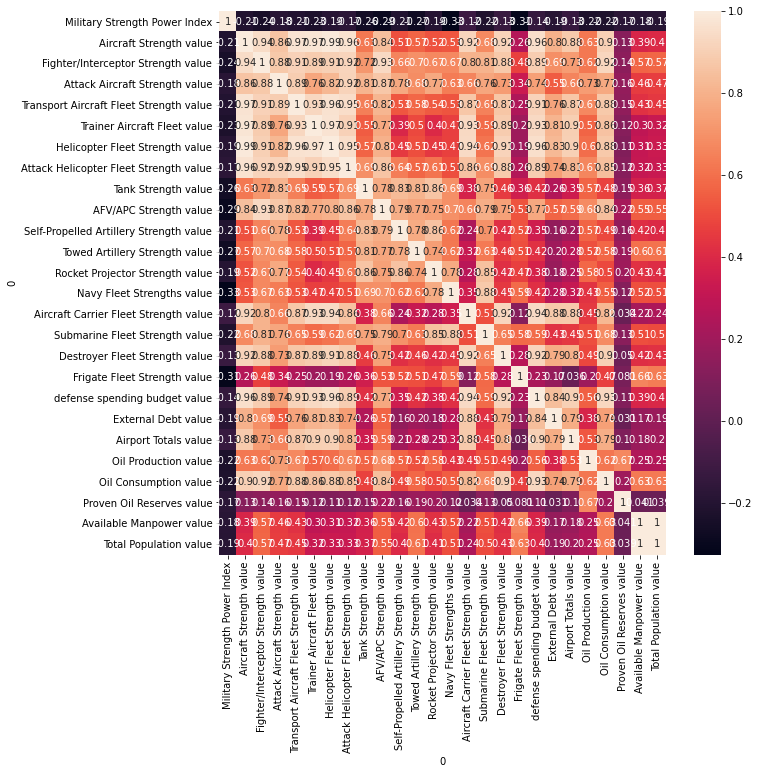

In [132]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Decriptive statistics

In [133]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02
mean,0.978261,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,76.362319,0.326087,4.137681,1.797101,3.036232,1.399363e+10,5.194983e+11,290.043478,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07
std,1.358764,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,140.821984,1.804953,12.691276,9.195492,6.124510,6.731189e+10,1.847252e+12,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000e+07,5.394000e+08,2.000000,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05
25%,0.000000,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,5.250000,0.000000,0.000000,0.000000,0.000000,3.255000e+08,9.361500e+09,33.500000,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06
50%,1.000000,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,30.000000,0.000000,0.000000,0.000000,0.000000,2.100909e+09,3.997000e+10,68.000000,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07
75%,2.000000,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,72.750000,0.000000,2.750000,0.000000,4.000000,6.957750e+09,1.830250e+11,150.750000,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07
max,10.000000,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,7.500000e+11,1.791000e+13,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09


# Data Preprocessing

In [134]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [135]:
X = df

In [136]:
scaler = StandardScaler()

In [137]:
X = scaler.fit_transform(X)

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [138]:
from pyclustertend import hopkins

In [139]:
hopkins(X, X.shape[0])

0.07384130445255965

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [140]:
ssd = [] 

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [141]:
ssd

[1915.8875924487027,
 1327.608761071001,
 1051.5873818445214,
 857.2198400115772,
 751.4119059795393,
 618.5203650630406,
 520.3283937283411,
 453.074821121796]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'elbow method')

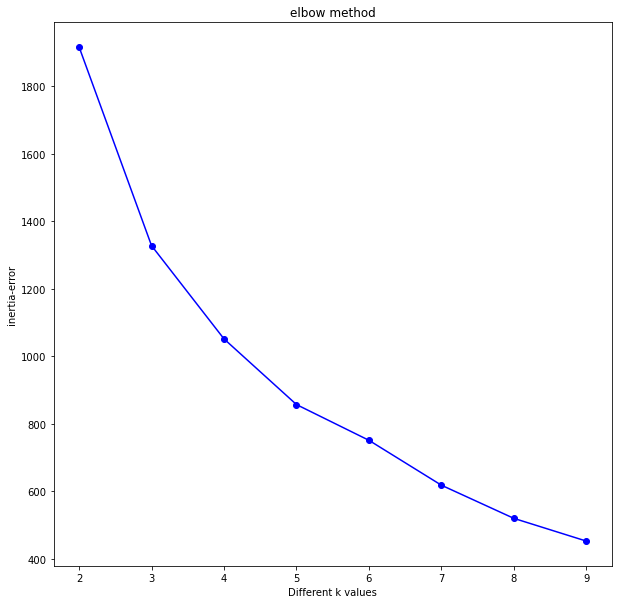

In [142]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [143]:
pd.Series(ssd).diff()

<IPython.core.display.Javascript object>

0           NaN
1   -588.278831
2   -276.021379
3   -194.367542
4   -105.807934
5   -132.891541
6    -98.191971
7    -67.253573
dtype: float64

In [144]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,0
1,NaN
2,588.278831
3,276.021379
4,194.367542
5,105.807934
6,132.891541
7,98.191971
8,67.253573


<AxesSubplot:>

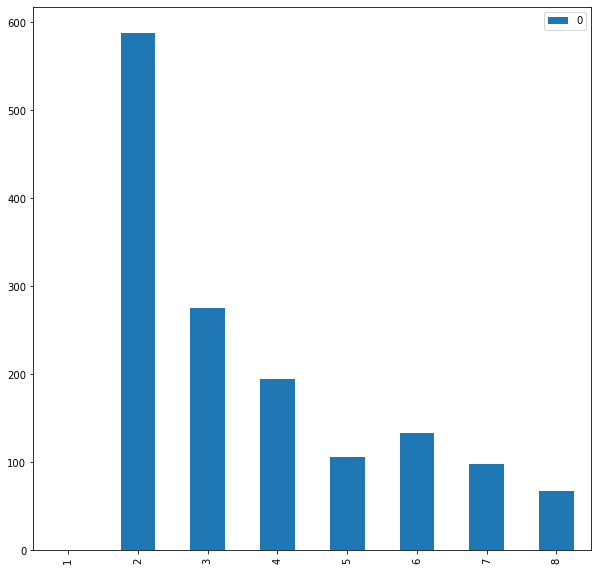

In [145]:
df1_diff.plot(kind='bar')

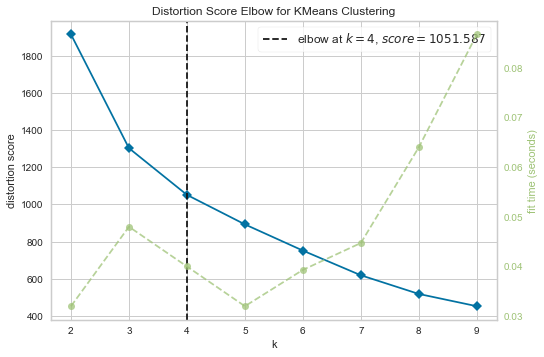

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [146]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

Silhouette analysis

In [147]:
from sklearn.metrics import silhouette_score

In [148]:
silhouette_score(X, kmeans.labels_)

0.2606979052257372

In [149]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8624735532349614
For n_clusters=3, the silhouette score is 0.7987105038732268
For n_clusters=4, the silhouette score is 0.6536232336093466
For n_clusters=5, the silhouette score is 0.4865046545121633
For n_clusters=6, the silhouette score is 0.4765886315083294
For n_clusters=7, the silhouette score is 0.465358803243099
For n_clusters=8, the silhouette score is 0.4554029593165488


In [150]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [151]:
model.inertia_

1053.5030595576122

In [152]:
model.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 0, 1, 1, 1])

In [158]:
df2["cluster"] = model.labels_

In [160]:
df2[df2["cluster"] == 0]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
3,Algeria,0,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998,0,6734,0
18,Brazil,0,715,43,78,126,198,242,12,437,1820,132,565,84,112,0,6,0,7,27800000000,547400000000,4093,2622000,3020000,13000000000,107764996,208846892,8514877,7491,50000,16145,0
23,Canada,0,385,62,0,38,135,145,0,80,1973,0,133,0,64,0,4,0,12,22500000000,1608000000000,1467,3977000,2500000,169700000000,16110865,35881659,9984670,202080,636,8893,0
36,Egypt,0,1054,215,88,59,387,294,81,4295,11700,1139,2189,1084,316,2,8,0,7,11200000000,77470000000,83,589400,832000,4400000000,42946553,99413317,1001450,2450,3500,2612,0
41,France,0,1229,269,0,121,187,589,62,528,6028,109,12,13,180,4,9,11,11,41500000000,5360000000000,464,15170,1600000,72350000,30111868,67364357,643801,4853,8501,4072,0
44,Germany,0,712,128,74,71,26,386,56,245,4583,108,0,38,80,0,6,0,9,50000000000,5326000000000,539,43410,2500000,145400000,37010559,80457737,357022,2389,7467,3694,0
46,Greece,0,566,187,0,15,143,231,29,1355,3691,547,463,152,116,0,11,0,13,4844000000,506600000000,77,2753,350000,10000000,4993347,10761523,131957,13676,6,1110,0
50,India,0,2123,538,172,250,359,722,23,4292,8686,235,4060,266,285,1,16,10,13,61000000000,501600000000,346,733900,5000000,4621000000,622480340,1296834042,3287263,7000,14500,13888,0
51,Indonesia,0,462,41,39,54,109,177,16,313,1178,153,366,36,282,0,5,0,7,7600000000,344400000000,673,801700,1630000,3230000000,130868127,262787403,1904569,54716,21579,2958,0
52,Iran,0,509,155,23,62,94,100,12,2056,4300,570,2088,1935,398,0,34,0,7,19600000000,7995000000,319,4469000,2000000,158400000000,47324105,83024745,1648195,2440,850,5894,0


In [161]:
df2[df2["cluster"] == 1]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
1,Afghanistan,1,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0,1200,5987,1
2,Albania,2,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362,41,691,1
4,Angola,0,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1600,1300,5369,1
5,Argentina,0,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,4989,11000,11968,1
6,Armenia,2,64,0,9,3,13,37,20,110,748,38,150,68,0,0,0,0,0,1385000000,10410000000,11,0,47500,0,1696085,3038217,29743,0,0,1570,1
7,Australia,0,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,26300000000,1714000000000,480,263000,1005000,1821000000,10808002,23470145,7741220,25760,2000,0,1
8,Austria,0,120,15,0,11,32,62,0,56,467,33,0,0,0,0,0,0,0,3380000000,630800000000,52,14260,215000,43000000,4017691,8793370,83871,0,0,2524,1
9,Azerbaijan,0,147,17,12,1,29,88,17,570,1451,187,227,162,31,0,4,0,1,2805000000,17410000000,37,789300,180000,7000000000,5042346,10046516,86600,713,0,2468,1
10,Bahrain,1,109,17,0,2,37,65,22,180,843,33,26,17,39,0,0,0,1,1415000000,52150000000,4,45000,55000,124600000,806505,1422659,760,161,0,0,1
11,Bangladesh,0,177,44,0,11,57,67,0,276,1230,18,419,72,112,0,2,0,8,3800000000,50260000000,18,3666,112000,28000000,78913289,159453001,143998,580,8370,4413,1


In [162]:
df2[df2["cluster"] == 2]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
131,United States,0,13264,2085,715,945,2643,5768,967,6289,39253,1465,2740,1366,490,20,66,91,0,750000000000,17910000000000,13513,9352000,20000000,36520000000,144872845,329256465,9826675,19924,41009,12048,2


In [163]:
df2[df2["cluster"] == 3]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
27,China,0,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777,2,74,36,52,237000000000,1598000000000,507,3838000,13500000,25620000000,752855402,1384688986,9596961,14500,110000,22457,3
102,Russia,0,4163,873,742,424,497,1522,531,12950,27038,6083,4465,3860,603,1,62,16,10,48000000000,539600000000,1218,10580000,3225000,80000000000,69640160,142122776,17098242,37653,102000,22408,3


In [164]:
from sklearn.metrics import silhouette_score

In [165]:
print(f'Silhouette Score(n=4): {silhouette_score(X, df2.cluster)}')

Silhouette Score(n=4): 0.5035616415673021


In [166]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8624735532349614
For n_clusters=3, the silhouette score is 0.8164060173459898
For n_clusters=4, the silhouette score is 0.47887079368606333
For n_clusters=5, the silhouette score is 0.5738713563497861
For n_clusters=6, the silhouette score is 0.5024806757944595
For n_clusters=7, the silhouette score is 0.465990131951542
For n_clusters=8, the silhouette score is 0.4431530610022411


In [ ]:
Hierarchical Clustering

In [171]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [172]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

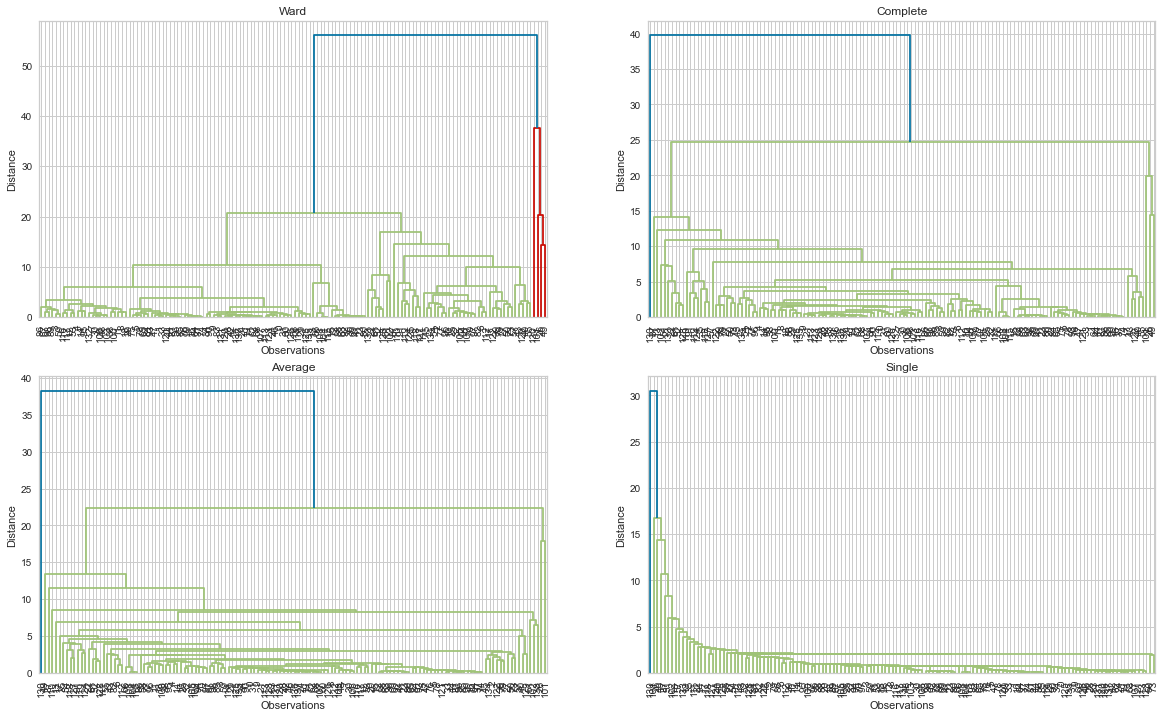

In [173]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [174]:
from sklearn.cluster import AgglomerativeClustering

In [175]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [176]:
df2["cluster_1"] = model1.labels_

In [177]:
df2[df2["cluster_1"] == 0]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,cluster_1
27,China,0,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777,2,74,36,52,237000000000,1598000000000,507,3838000,13500000,25620000000,752855402,1384688986,9596961,14500,110000,22457,3,0
50,India,0,2123,538,172,250,359,722,23,4292,8686,235,4060,266,285,1,16,10,13,61000000000,501600000000,346,733900,5000000,4621000000,622480340,1296834042,3287263,7000,14500,13888,0,0
102,Russia,0,4163,873,742,424,497,1522,531,12950,27038,6083,4465,3860,603,1,62,16,10,48000000000,539600000000,1218,10580000,3225000,80000000000,69640160,142122776,17098242,37653,102000,22408,3,0


In [178]:
df2[df2["cluster_1"] == 1]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,cluster_1
3,Algeria,0,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998,0,6734,0,1
7,Australia,0,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,26300000000,1714000000000,480,263000,1005000,1821000000,10808002,23470145,7741220,25760,2000,0,1,1
11,Bangladesh,0,177,44,0,11,57,67,0,276,1230,18,419,72,112,0,2,0,8,3800000000,50260000000,18,3666,112000,28000000,78913289,159453001,143998,580,8370,4413,1,1
18,Brazil,0,715,43,78,126,198,242,12,437,1820,132,565,84,112,0,6,0,7,27800000000,547400000000,4093,2622000,3020000,13000000000,107764996,208846892,8514877,7491,50000,16145,0,1
23,Canada,0,385,62,0,38,135,145,0,80,1973,0,133,0,64,0,4,0,12,22500000000,1608000000000,1467,3977000,2500000,169700000000,16110865,35881659,9984670,202080,636,8893,0,1
26,Chile,0,282,44,0,30,93,92,0,300,1430,48,158,10,69,0,4,0,10,4250000000,183400000000,481,3244,325000,150000000,8657902,17925262,756102,6435,12290,7801,1,1
28,Colombia,0,469,21,38,76,80,224,0,0,595,6,110,0,453,0,11,0,4,10600000000,124600000000,836,853600,300000,2002000000,24084498,48168996,1138910,3208,24725,6672,1,1
33,Denmark,0,113,33,0,4,38,35,0,57,972,22,0,0,74,0,0,0,9,4760000000,484800000000,80,137100,162000,490600000,2590457,5809502,43094,7314,400,140,1,1
36,Egypt,0,1054,215,88,59,387,294,81,4295,11700,1139,2189,1084,316,2,8,0,7,11200000000,77470000000,83,589400,832000,4400000000,42946553,99413317,1001450,2450,3500,2612,0,1
40,Finland,0,194,55,0,11,105,127,0,200,2050,100,627,75,246,0,0,0,0,3570000000,150600000000,148,0,205000,0,2307420,5537364,338145,1250,7842,2563,1,1


In [179]:
df2[df2["cluster_1"] == 2]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,cluster_1
131,United States,0,13264,2085,715,945,2643,5768,967,6289,39253,1465,2740,1366,490,20,66,91,0,750000000000,17910000000000,13513,9352000,20000000,36520000000,144872845,329256465,9826675,19924,41009,12048,2,2


In [180]:
df2[df2["cluster_1"] == 3]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,cluster_1
1,Afghanistan,1,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0,1200,5987,1,3
2,Albania,2,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362,41,691,1,3
4,Angola,0,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1600,1300,5369,1,3
5,Argentina,0,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,4989,11000,11968,1,3
6,Armenia,2,64,0,9,3,13,37,20,110,748,38,150,68,0,0,0,0,0,1385000000,10410000000,11,0,47500,0,1696085,3038217,29743,0,0,1570,1,3
8,Austria,0,120,15,0,11,32,62,0,56,467,33,0,0,0,0,0,0,0,3380000000,630800000000,52,14260,215000,43000000,4017691,8793370,83871,0,0,2524,1,3
9,Azerbaijan,0,147,17,12,1,29,88,17,570,1451,187,227,162,31,0,4,0,1,2805000000,17410000000,37,789300,180000,7000000000,5042346,10046516,86600,713,0,2468,1,3
10,Bahrain,1,109,17,0,2,37,65,22,180,843,33,26,17,39,0,0,0,1,1415000000,52150000000,4,45000,55000,124600000,806505,1422659,760,161,0,0,1,3
12,Belarus,0,202,39,68,4,28,63,21,532,1560,482,228,238,0,0,0,0,0,623702800,39920000000,65,32000,190000,198000000,4982905,9527543,207600,0,2500,3599,1,3
13,Belgium,1,148,43,0,12,64,29,0,0,984,0,0,0,17,0,0,0,2,4921000000,1281000000000,41,0,645000,0,4833107,11570762,30528,67,2043,1297,1,3
